## Step 4: Temporal Patterns EDA (Part 1: Time-focused)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CLEAN_PATH = "../data/processed/metro-trips-2025-q2_cleaned.csv"
df = pd.read_csv(CLEAN_PATH, parse_dates=["start_dt", "end_dt"])

In [5]:
df["hour"] = df["start_dt"].dt.hour
df["weekday"] = df["start_dt"].dt.day_name()
df["month"] = df["start_dt"].dt.month_name()

# Optional: ordered weekday for plotting
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

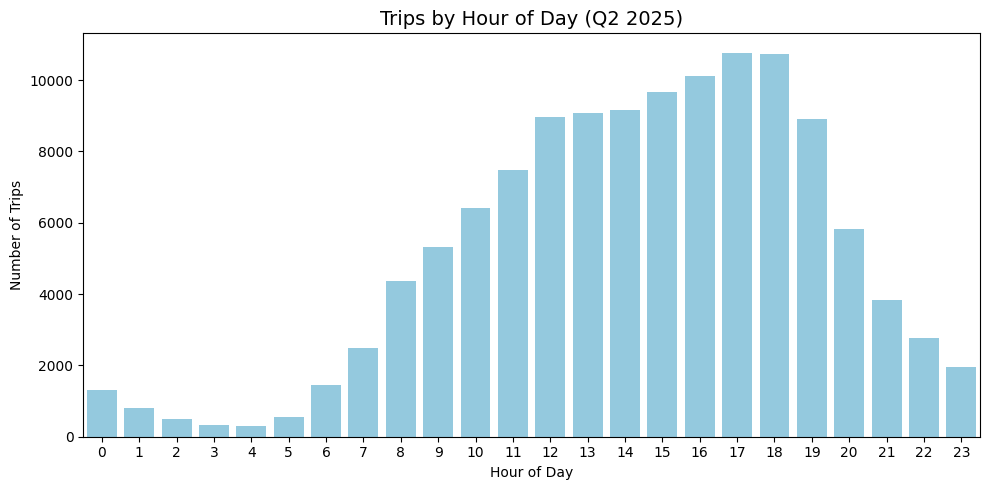

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="hour", color="skyblue", order=sorted(df["hour"].unique()))
plt.title("Trips by Hour of Day (Q2 2025)", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

plt.savefig("../visuals/plots/trips_by_hour_q2_2025.png", dpi=300)

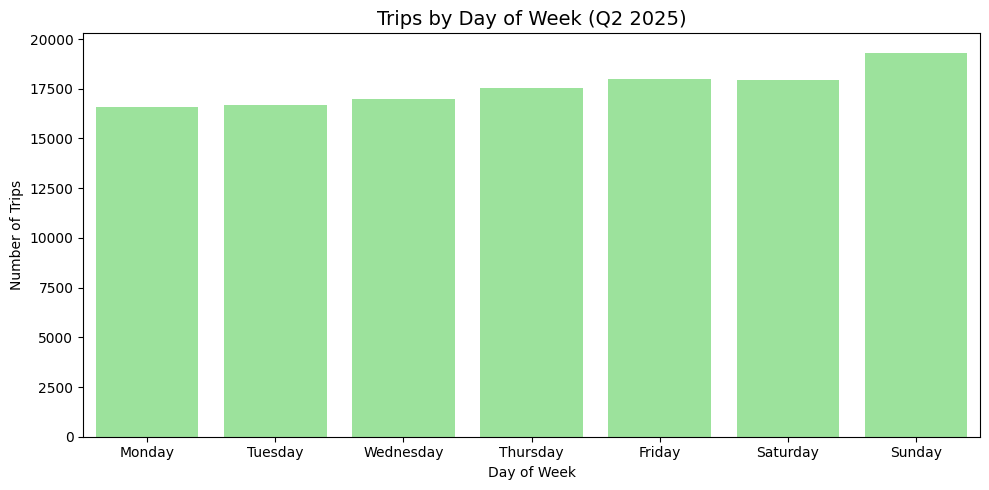

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="weekday", color="lightgreen", order=weekday_order)
plt.title("Trips by Day of Week (Q2 2025)", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

plt.savefig("../visuals/plots/trips_by_weekday_q2_2025.png", dpi=300)

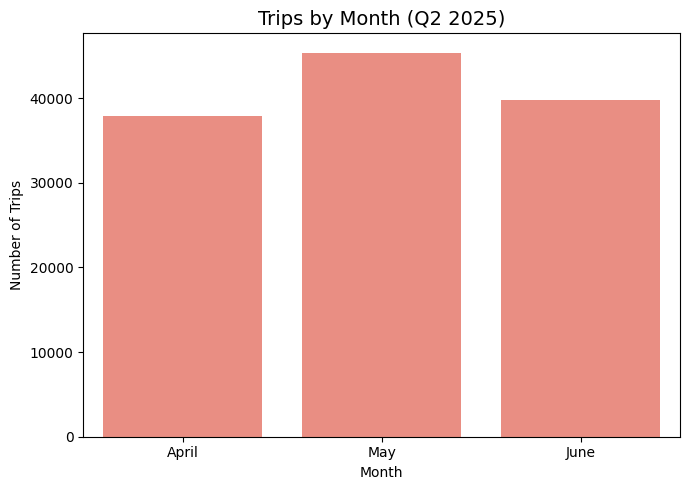

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="month", color="salmon", order=["April","May","June"])
plt.title("Trips by Month (Q2 2025)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

plt.savefig("../visuals/plots/trips_by_month_q2_2025.png", dpi=300)

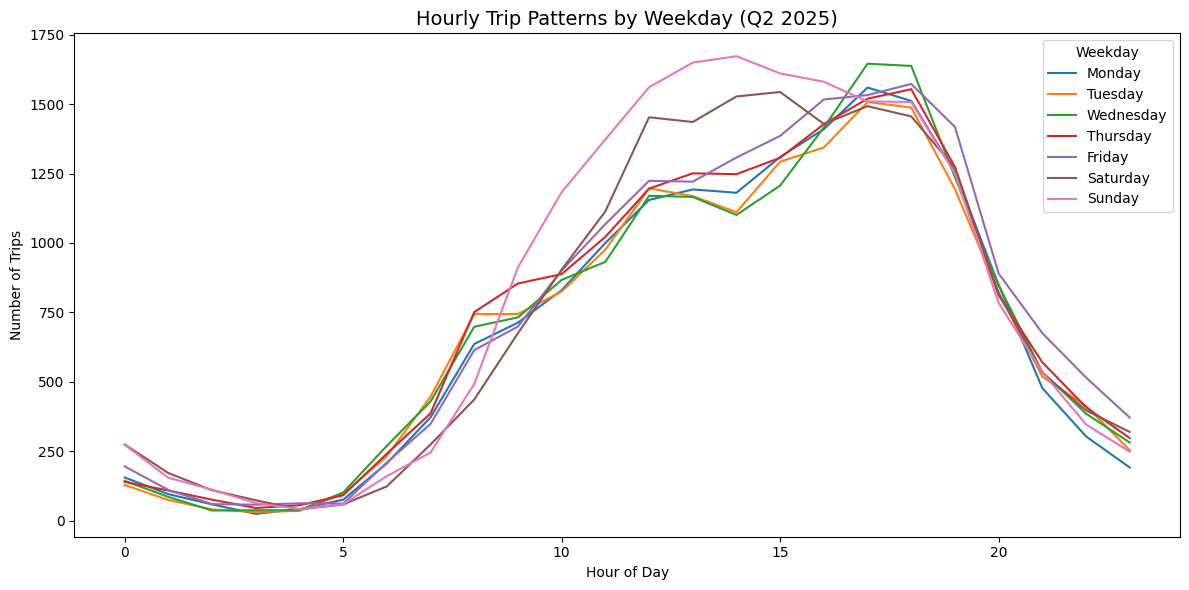

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df.groupby(["weekday","hour"]).size().reset_index(name="trips"),
    x="hour", y="trips", hue="weekday", hue_order=weekday_order
)
plt.title("Hourly Trip Patterns by Weekday (Q2 2025)", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend(title="Weekday")
plt.tight_layout()
plt.show()

plt.savefig("../visuals/plots/hourly_patterns_by_weekday_q2_2025.png", dpi=300)


## Step 4: Spatial EDA (Part 2)

In [10]:
# Top 10 start stations
top_start = (
    df.groupby(["start_station", "start_lat", "start_lon"])
    .size()
    .reset_index(name="trip_count")
    .sort_values("trip_count", ascending=False)
    .head(10)
)

# Top 10 end stations
top_end = (
    df.groupby(["end_station", "end_lat", "end_lon"])
    .size()
    .reset_index(name="trip_count")
    .sort_values("trip_count", ascending=False)
    .head(10)
)

print("Top start stations:")
print(top_start)

print("\nTop end stations:")
print(top_end)

Top start stations:
     start_station  start_lat   start_lon  trip_count
60            4214  33.995560 -118.481552        5081
0             3005  34.048500 -118.258537        4881
61            4215  34.014309 -118.491341        4280
56            4210  33.984341 -118.471550        3467
204           4613  34.069752 -118.445351        2614
129           4487  34.062111 -118.446922        2126
209           4643  34.072620 -118.449440        2043
156           4543  33.957180 -118.451248        1972
149           4528  34.060970 -118.444366        1964
20            3035  34.048401 -118.260948        1616

Top end stations:
     end_station    end_lat     end_lon  trip_count
61          4215  34.014309 -118.491341        5024
0           3005  34.048500 -118.258537        4894
60          4214  33.995560 -118.481552        4519
56          4210  33.984341 -118.471550        3435
204         4613  34.069752 -118.445351        2694
129         4487  34.062111 -118.446922        2533
149

/tmp/ipykernel_2625/2864081087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_start, x="trip_count", y="start_station", palette="Blues_r")


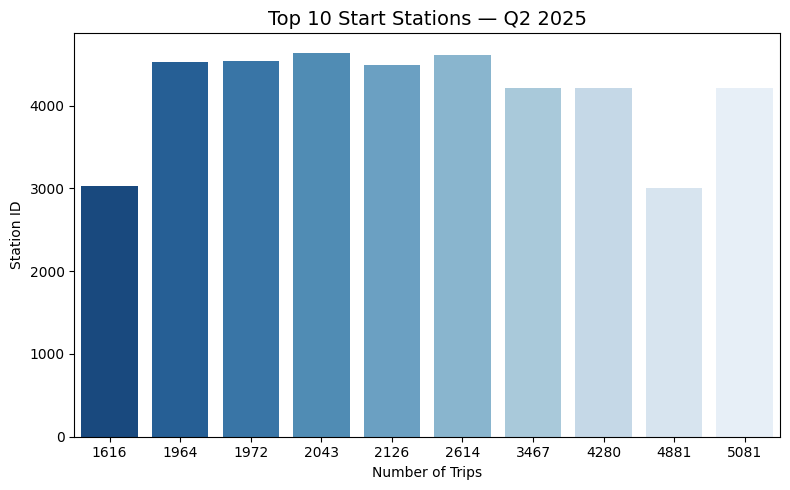

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_start, x="trip_count", y="start_station", palette="Blues_r")
plt.title("Top 10 Start Stations — Q2 2025", fontsize=14)
plt.xlabel("Number of Trips")
plt.ylabel("Station ID")
plt.tight_layout()
plt.savefig("../visuals/plots/top_start_stations_q2_2025.png", dpi=300)
plt.show()


/tmp/ipykernel_2625/243321101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_end, x="trip_count", y="end_station", palette="Greens_r")


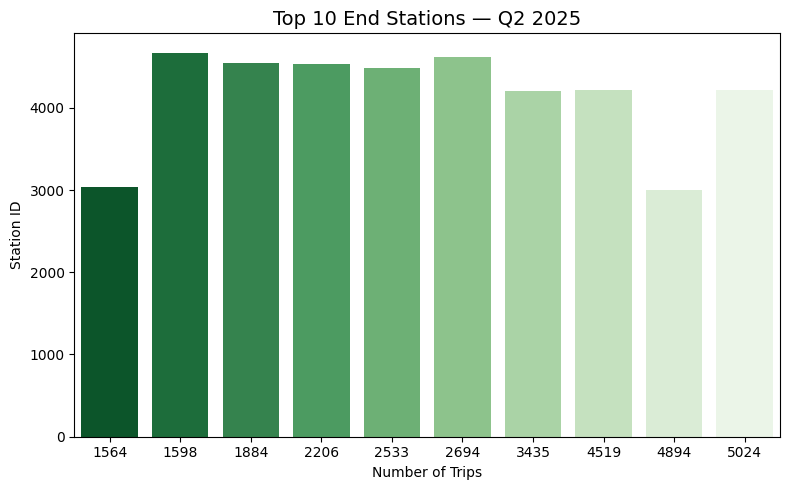

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_end, x="trip_count", y="end_station", palette="Greens_r")
plt.title("Top 10 End Stations — Q2 2025", fontsize=14)
plt.xlabel("Number of Trips")
plt.ylabel("Station ID")
plt.tight_layout()
plt.savefig("../visuals/plots/top_end_stations_q2_2025.png", dpi=300)
plt.show()

In [13]:
top_od = (
    df.groupby(["start_station", "end_station"])
    .size()
    .reset_index(name="trip_count")
    .sort_values("trip_count", ascending=False)
    .head(10)
)

print("Top 10 OD Pairs:")
print(top_od)

Top 10 OD Pairs:
      start_station  end_station  trip_count
3              3005         3005        2094
3775           4214         4214        1764
3776           4214         4215        1322
3826           4215         4215        1076
3595           4210         4210        1035
8833           4543         4543         990
3825           4215         4214         890
8877           4544         4544         886
7409           4487         4487         788
3600           4210         4215         779


/tmp/ipykernel_2625/2326953717.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_od, x="trip_count", y="route", palette="rocket")


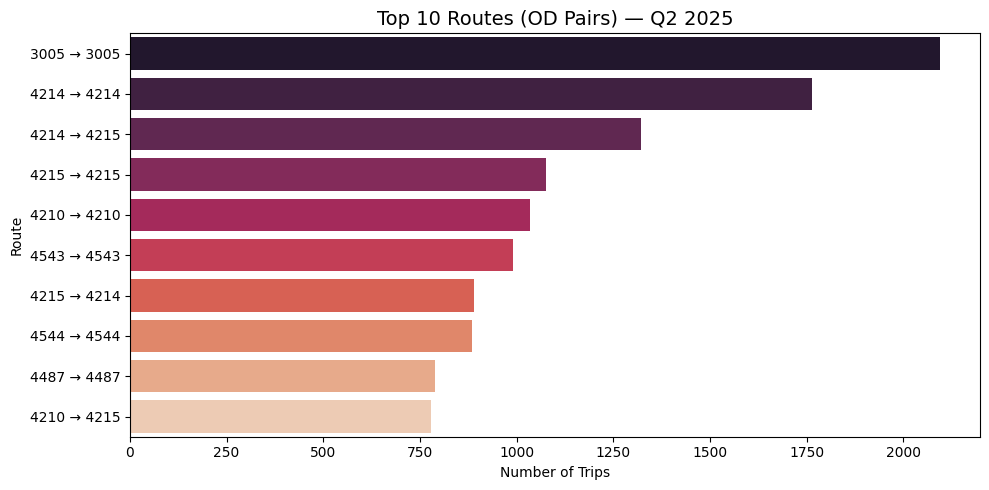

In [14]:
# Create a label "start → end" for plotting
top_od["route"] = top_od["start_station"].astype(str) + " → " + top_od["end_station"].astype(str)

plt.figure(figsize=(10,5))
sns.barplot(data=top_od, x="trip_count", y="route", palette="rocket")
plt.title("Top 10 Routes (OD Pairs) — Q2 2025", fontsize=14)
plt.xlabel("Number of Trips")
plt.ylabel("Route")
plt.tight_layout()
plt.savefig("../visuals/plots/top_od_pairs_q2_2025.png", dpi=300)
plt.show()

## Step 4: Interactive OD Map with Folium (Part 3)

In [15]:
%pip install folium



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import folium

# Ensure output folder exists
import os
os.makedirs("../visuals/interactive", exist_ok=True)

# Get top 10 OD pairs (with coordinates)
top_od_coords = (
    df.groupby(
        ["start_station", "start_lat", "start_lon", "end_station", "end_lat", "end_lon"]
    )
    .size()
    .reset_index(name="trip_count")
    .sort_values("trip_count", ascending=False)
    .head(10)
)

# Center map on average of start points
center_lat = top_od_coords["start_lat"].mean()
center_lon = top_od_coords["start_lon"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Add OD routes to map
for _, row in top_od_coords.iterrows():
    start = (row["start_lat"], row["start_lon"])
    end = (row["end_lat"], row["end_lon"])
    
    # Add markers
    folium.Marker(
        start,
        popup=f"Start: {row['start_station']}<br>Trips: {row['trip_count']}",
        icon=folium.Icon(color="blue", icon="play")
    ).add_to(m)
    
    folium.Marker(
        end,
        popup=f"End: {row['end_station']}<br>Trips: {row['trip_count']}",
        icon=folium.Icon(color="red", icon="stop")
    ).add_to(m)
    
    # Draw line between start and end
    folium.PolyLine(
        locations=[start, end],
        color="orange",
        weight=3,
        opacity=0.7,
        popup=f"{row['start_station']} → {row['end_station']} ({row['trip_count']} trips)"
    ).add_to(m)

# Save interactive map
map_path = "../visuals/interactive/top10_od_pairs_map_q2_2025.html"
m.save(map_path)
map_path


'../visuals/interactive/top10_od_pairs_map_q2_2025.html'

## Step 4 - Kepler.gl Flow Map (Top 10 OD Pairs) (Part-4)

In [17]:
%pip install keplergl


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
from keplergl import KeplerGl
import json, os

In [19]:
# Reuse (or recompute) top 10 OD with coordinates
top_od_coords = (
    df.groupby(
        ["start_station", "start_lat", "start_lon", "end_station", "end_lat", "end_lon"]
    )
    .size()
    .reset_index(name="trip_count")
    .sort_values("trip_count", ascending=False)
    .head(10)
)

# Convert to GeoJSON (LineString from start -> end)
features = []
for _, r in top_od_coords.iterrows():
    if pd.notna(r["start_lat"]) and pd.notna(r["start_lon"]) and pd.notna(r["end_lat"]) and pd.notna(r["end_lon"]):
        features.append({
            "type": "Feature",
            "properties": {
                "start_station": int(r["start_station"]),
                "end_station": int(r["end_station"]),
                "trip_count": int(r["trip_count"])
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [float(r["start_lon"]), float(r["start_lat"])],
                    [float(r["end_lon"]), float(r["end_lat"])]
                ]
            }
        })

od_geojson = {"type": "FeatureCollection", "features": features}

# (Optional) Save the GeoJSON alongside the HTML
geojson_path = "../visuals/interactive/top10_od_pairs_q2_2025.geojson"
with open(geojson_path, "w") as f:
    json.dump(od_geojson, f)
geojson_path


'../visuals/interactive/top10_od_pairs_q2_2025.geojson'

In [20]:
# Center map roughly on LA downtown using the mean of starts
center_lat = top_od_coords["start_lat"].mean()
center_lon = top_od_coords["start_lon"].mean()

kmap = KeplerGl(height=600)
kmap.add_data(data=od_geojson, name="Top_OD_Pairs")

# Minimal config: a GeoJSON layer with line width by trip_count
config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "od_lines",
          "type": "geojson",
          "config": {
            "dataId": "Top_OD_Pairs",
            "label": "Top OD Lines",
            "color": [255, 153, 31],
            "columns": {"geojson": "geometry"},
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "thickness": 2,
              "strokeColor": [255, 153, 31],
              "colorRange": {"name": "ColorBrewer Oranges-6", "type": "sequential", "category": "ColorBrewer"},
              "strokeColorRange": {"name": "ColorBrewer Oranges-6", "type": "sequential", "category": "ColorBrewer"},
              "sizeRange": [1, 8],
              "radius": 10
            },
            "textLabel": [
              {
                "field": {"name": "trip_count", "type": "integer"},
                "color": [0, 0, 0],
                "size": 12,
                "offset": [0, 0],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "strokeColor": None,
            "colorField": {"name": "trip_count", "type": "integer"},
            "colorScale": "quantile",
            "sizeField": {"name": "trip_count", "type": "integer"},
            "sizeScale": "sqrt"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "Top_OD_Pairs": [
              {"name":"start_station","format":None},
              {"name":"end_station","format":None},
              {"name":"trip_count","format":None}
            ]
          },
          "enabled": True
        }
      }
    },
    "mapState": {
      "latitude": float(center_lat),
      "longitude": float(center_lon),
      "zoom": 12,
      "pitch": 0,
      "bearing": 0
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True, "road": True, "border": False, "building": True, "water": True, "land": True
      }
    }
  }
}

kmap.config = config


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [ ]:
html_path = "../visuals/interactive/kepler_top10_od_pairs_q2_2025.html"
kmap.save_to_html(file_name=html_path, read_only=True)
html_path

python -m http.server 8000